<a href="https://colab.research.google.com/github/abarman123/ECE1512_2022W_ProjectRepo_Ayandev/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir(r'/content/drive/My Drive/ECE1512')


Mounted at /content/drive


#Part 1 1-D Digit Classification

Task 1

In [3]:
#LOAD MNIST-1D dataset
from mnist1d_utils import *
from tensorflow.keras import regularizers
dataset = pickle.load(open('MNIST1D.pkl', 'rb'))
x_test = np.expand_dims(dataset['x_test'], axis=-1)

y_test = dataset['y_test']

x_train=np.expand_dims(dataset['x'], axis=-1)

y_train=dataset['y']

In [4]:
#dataset

MODEL creation
1D CNN with 3 convolutional layers fully connected

In [5]:
#model creation 

def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv1D(25, 5,
                                   strides=1,
                                   padding='same',
                                   activation='relu',
                                   input_shape=(40, 1),
                                   activity_regularizer=regularizers.l2(5e-4)))
  
  model.add(tf.keras.layers.Conv1D(25, 3,
                                   strides=1,
                                   padding='same',
                                   activation='relu',
                                   input_shape=(40, 1),
                                   activity_regularizer=regularizers.l2(5e-4)))
  model.add(tf.keras.layers.Conv1D(25, 3,
                                   strides=1,
                                   padding='same',
                                   activation='relu',
                                   input_shape=(40, 1),
                                   activity_regularizer=regularizers.l2(5e-4)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(10, activation='softmax',
                                  activity_regularizer=regularizers.l2(5e-4)))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return model
x_test.shape

(1000, 40, 1)

In [6]:
model_mnist = create_model()
model_mnist.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 25)            150       
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 25)            1900      
                                                                 
 conv1d_2 (Conv1D)           (None, 40, 25)            1900      
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 10)                10010     
                                                                 
Total params: 13,960
Trainable params: 13,960
Non-trainable params: 0
_________________________________________________________________


In [7]:
history2=model_mnist.fit(x_train, y_train, validation_split=0.1, epochs=200)

Epoch 1/200
113/113 [==============================] - 2s 7ms/step - loss: 2.3253 - accuracy: 0.1114 - val_loss: 2.3183 - val_accuracy: 0.1275
Epoch 2/200
113/113 [==============================] - 1s 5ms/step - loss: 2.3004 - accuracy: 0.1367 - val_loss: 2.2954 - val_accuracy: 0.1100
Epoch 3/200
113/113 [==============================] - 1s 5ms/step - loss: 2.2583 - accuracy: 0.1319 - val_loss: 2.2475 - val_accuracy: 0.1200
Epoch 4/200
113/113 [==============================] - 1s 5ms/step - loss: 2.1860 - accuracy: 0.1742 - val_loss: 2.1691 - val_accuracy: 0.1600
Epoch 5/200
113/113 [==============================] - 1s 5ms/step - loss: 2.0878 - accuracy: 0.2178 - val_loss: 2.0568 - val_accuracy: 0.1950
Epoch 6/200
113/113 [==============================] - 1s 6ms/step - loss: 1.9802 - accuracy: 0.2486 - val_loss: 1.9568 - val_accuracy: 0.2450
Epoch 7/200
113/113 [==============================] - 1s 5ms/step - loss: 1.8929 - accuracy: 0.2858 - val_loss: 1.8783 - val_accuracy: 0.2975

In [8]:
model_mnist.save('MNIST1D.h5')

In [9]:
#model=load_model('MNIST1D.h5')

In [10]:
#print(results)

# **Evaluate performance of model**

Overall Classification Accuracy:
32/32 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.9440
[0.30804961919784546, 0.9440000057220459]
Class-wise Accuracy:
[1.         0.94230769 0.93258427 0.98113208 0.95283019 0.94897959
 0.96969697 0.90625    0.92857143 0.87254902]
Confustion Matrix:
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.94230769 0.03846154 0.         0.         0.00961538
  0.         0.         0.         0.00961538]
 [0.         0.         0.93258427 0.         0.         0.02247191
  0.         0.03370787 0.         0.01123596]
 [0.         0.         0.00943396 0.98113208 0.         0.00943396
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.95283019 0.00943396
  0.         0.         0.00943396 0.02830189]
 [0.         0.01020408 0.04081633 0.         0.         0.94897959
  0.         0.         0.         0.        ]
 [0

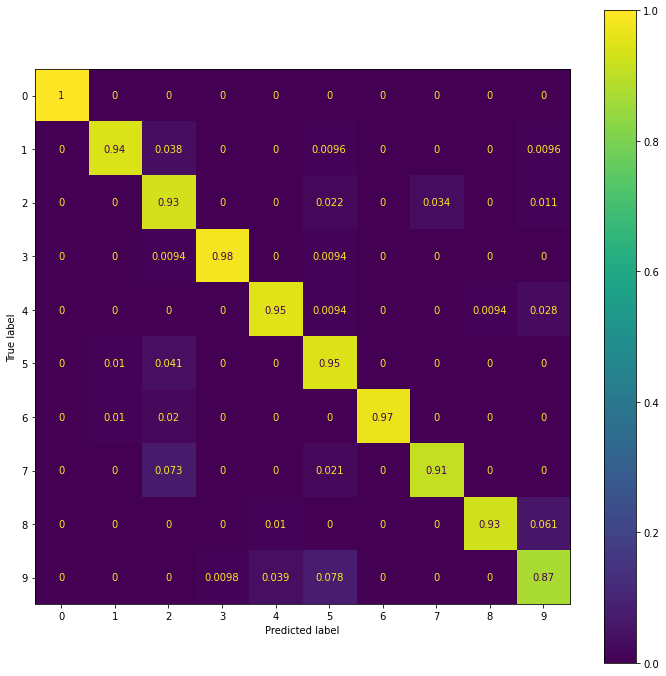

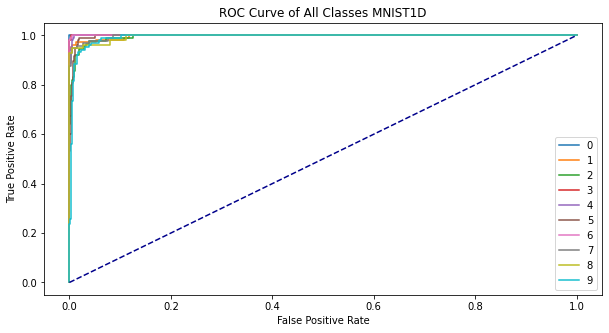

AUC scores for each class:
{0: 1.0, 1: 0.9971239697802198, 2: 0.994721197844078, 3: 0.9999577898780128, 4: 0.9994934785361529, 5: 0.9968889995022399, 6: 0.9999439455599277, 7: 0.9972345132743363, 8: 0.9957464138648808, 9: 0.9928271976942225}
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       0.98      0.94      0.96       104
           2       0.82      0.93      0.87        89
           3       0.99      0.98      0.99       106
           4       0.95      0.95      0.95       106
           5       0.86      0.95      0.90        98
           6       1.00      0.97      0.98        99
           7       0.97      0.91      0.94        96
           8       0.99      0.93      0.96        98
           9       0.89      0.87      0.88       102

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.9

In [11]:

y_predict = np.argmax(model_mnist.predict(x_test), axis=-1)
print('Overall Classification Accuracy:')
results = model_mnist.evaluate(x_test, y_test)
print(results)
conf_matrix = confusion_matrix(y_test, y_predict, normalize='true')
model_accuracy = conf_matrix.diagonal()
print('Class-wise Accuracy:')
print(model_accuracy)

# confusion matrix
print('Confustion Matrix:')
print(conf_matrix)
labels = ['0','1','2','3','4','5','6','7','8','9']
ConfMat = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(12, 12))
ConfMat.plot(ax=ax)

# ROC curve and AUC data
mnist_prob = model_mnist.predict(x_test)
mnist_fp = dict()
mnist_tp = dict()
mnist_auc = dict()



y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
number_classes = 10
plt.figure(figsize=(10,5))

for i in range(number_classes):
  mnist_fp[i], mnist_tp[i], _ = roc_curve(y_test_bin[:,i], mnist_prob[:,i])
  mnist_auc[i] = roc_auc_score(y_test_bin[:,i], mnist_prob[:,i])
  plt.plot(mnist_fp[i], mnist_tp[i], label=labels[i])
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of All Classes MNIST1D')
plt.legend()
plt.show()
print('AUC scores for each class:')
print(mnist_auc)

# Class-wise report for precision, recall and f1-score
print('Classification Report')
mnist_classification = classification_report(y_test, y_predict)
print(mnist_classification)

# precision, recall and f1-score
mnist_precision = metrics.precision_score(y_test, y_predict, average='macro')
print('Precision:', mnist_precision)
mnist_recall = metrics.recall_score(y_test, y_predict, average='macro', zero_division=0)
print(' Recall:', mnist_recall)
F1 = 2 * (mnist_precision * mnist_recall) / (mnist_precision + mnist_recall)
print(' F-1 Score:', F1)

In [12]:
#history = model_mnist.fit(x_test, y_test, epochs=50, batch_size=4)


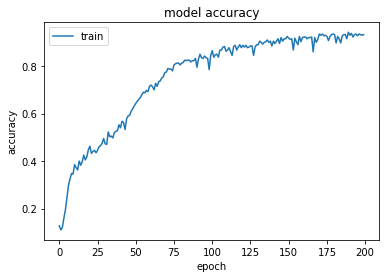

In [13]:
#accuracy curve

plt.plot(history2.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


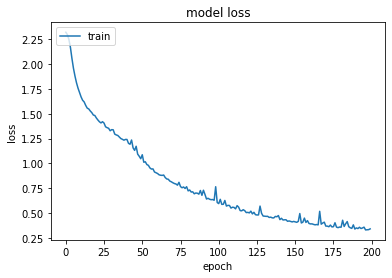

In [14]:
#Loss curve

plt.plot(history2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [15]:
# Search for success/failure cases 
print('Predicted output:', y_predict)
print('True output:', y_test)
mnist_incorrect_index = dict()
mnist_incorrect_predict = dict()
mnist_test_output = dict()
j = 0
for i in range(len(y_test)):
  if y_predict[i] != y_test[i]:
    mnist_incorrect_index[j] = i
    mnist_incorrect_predict[j] = y_predict[i]
    mnist_test_output[j] = y_test[i]
    j = j + 1
print('Incorrect test Index:', mnist_incorrect_index)
print('Incorrect Prediction:', mnist_incorrect_predict)
print('Actual Test output:', mnist_test_output)

Predicted output: [2 6 3 9 4 3 1 9 5 2 0 7 7 1 4 6 2 4 3 9 9 7 5 0 7 2 7 6 9 2 8 0 4 5 8 9 4
 1 1 0 1 5 7 4 8 1 0 1 2 9 6 5 3 9 8 4 4 6 5 3 9 8 9 3 6 3 4 4 3 4 6 7 5 7
 5 1 8 6 8 2 6 0 6 3 1 3 1 9 2 7 5 3 9 5 7 7 1 0 2 6 6 7 2 4 2 9 2 5 9 0 1
 7 1 9 2 0 5 1 8 2 2 0 0 8 5 7 7 2 4 5 0 6 9 4 2 1 8 3 9 1 5 3 0 6 4 5 2 0
 4 7 2 6 3 4 9 9 6 6 8 0 7 6 7 0 6 5 5 2 0 6 3 7 8 1 1 0 3 0 1 6 2 7 5 7 4
 1 1 9 2 0 0 3 0 3 4 5 9 5 5 7 8 7 2 0 5 4 9 7 9 8 3 8 4 3 8 5 3 4 0 6 1 5
 9 9 1 1 2 6 8 3 5 1 2 5 5 1 0 8 3 4 6 1 4 4 6 2 2 8 8 3 7 9 1 9 8 2 4 2 0
 7 4 7 6 7 6 7 2 3 4 0 7 6 5 0 4 0 4 8 7 2 9 2 0 0 3 6 8 5 4 8 8 5 6 8 6 4
 6 9 5 5 8 4 0 3 5 4 1 3 1 3 7 0 8 1 1 8 1 9 3 2 2 3 2 4 7 2 1 9 9 1 3 2 4
 9 3 9 1 9 3 5 5 3 4 7 3 2 1 3 8 6 7 0 4 8 6 6 5 3 2 9 3 9 5 2 5 2 1 6 4 9
 9 2 9 2 8 4 4 1 3 8 3 6 8 2 4 6 5 3 7 6 0 3 3 7 8 6 0 2 5 3 3 9 5 8 6 6 8
 1 1 4 7 1 1 7 0 3 3 6 2 0 1 8 9 8 1 8 9 5 4 5 3 7 4 9 2 9 2 1 2 0 8 9 0 3
 1 4 4 2 5 4 0 9 5 2 8 5 5 7 5 4 8 4 4 0 2 9 3 6 0 3 4 3 6 5 3 0 5 4 4 6 3
 5 5 6 

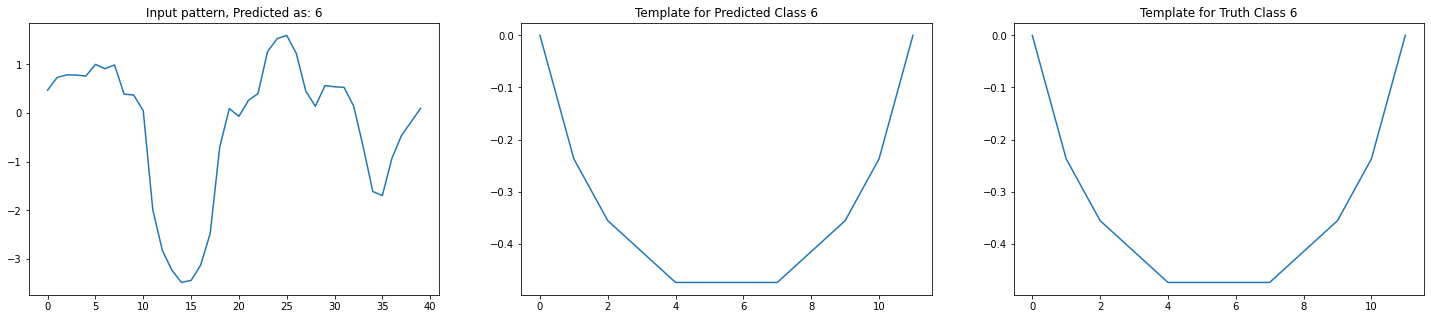

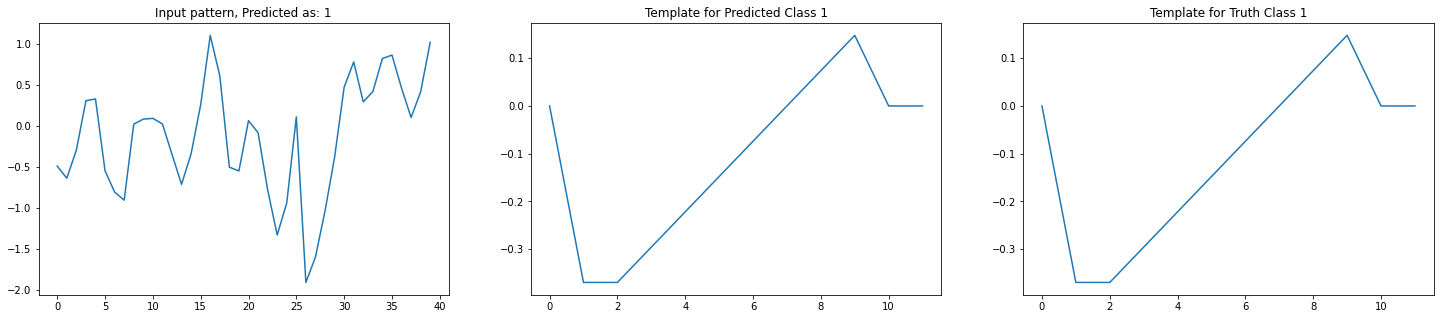

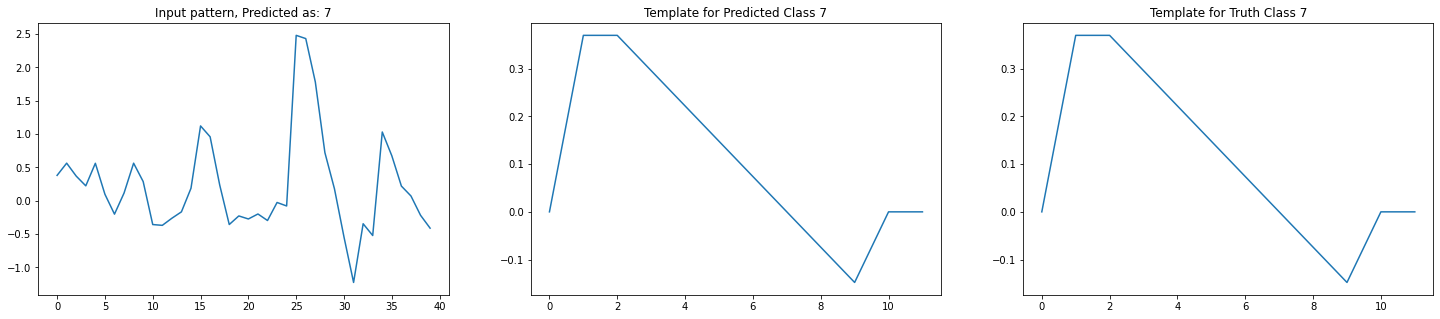

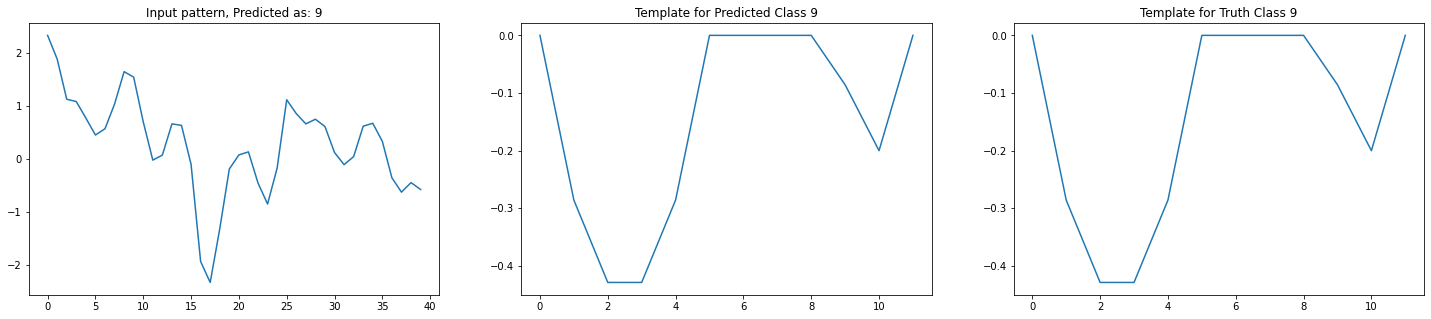

In [16]:
# Correct examples 


index_example1 = [1, 6, 11, 19]
for i in range(len(index_example1)):
  test_template_predict = np.transpose(dataset['templates']['x'][y_predict[index_example1[i]]]) # predicted outut class template
  test_template_truth = np.transpose(dataset['templates']['x'][y_test[index_example1[i]]])# Actual output class template from dataset
  plt.figure(figsize=(25,5))
  plt.subplot(1,3,1)
  plt.plot(x_test[index_example1[i]])
  plt.title('Input pattern, Predicted as: %d' % y_predict[index_example1[i]])
  plt.subplot(1,3,2)
  plt.plot(test_template_predict)
  plt.title('Template for Predicted Class %d' % y_predict[index_example1[i]])
  plt.subplot(1,3,3)
  plt.plot(test_template_truth)
  plt.title('Template for Truth Class %d' % y_test[index_example1[i]])



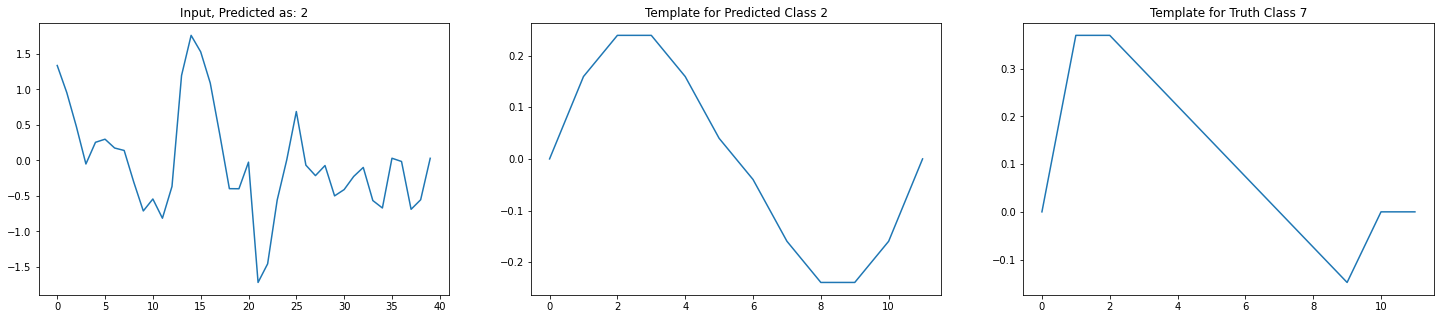

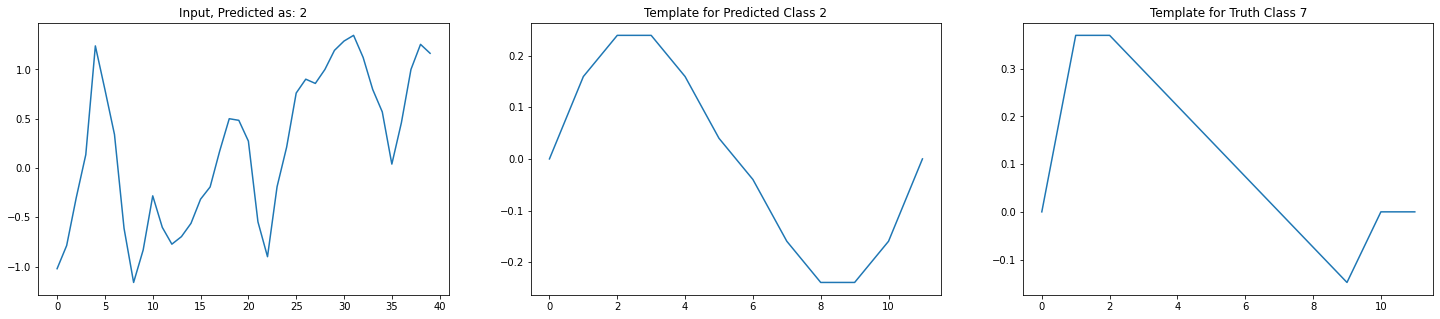

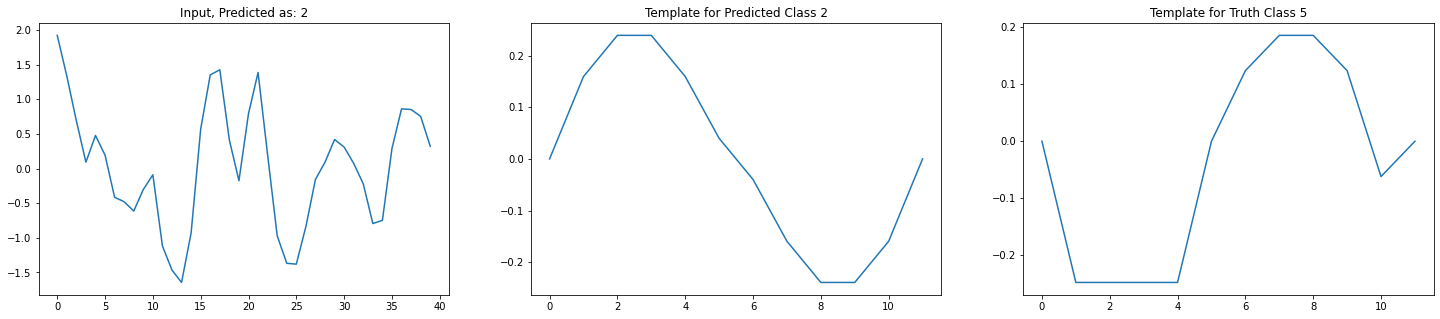

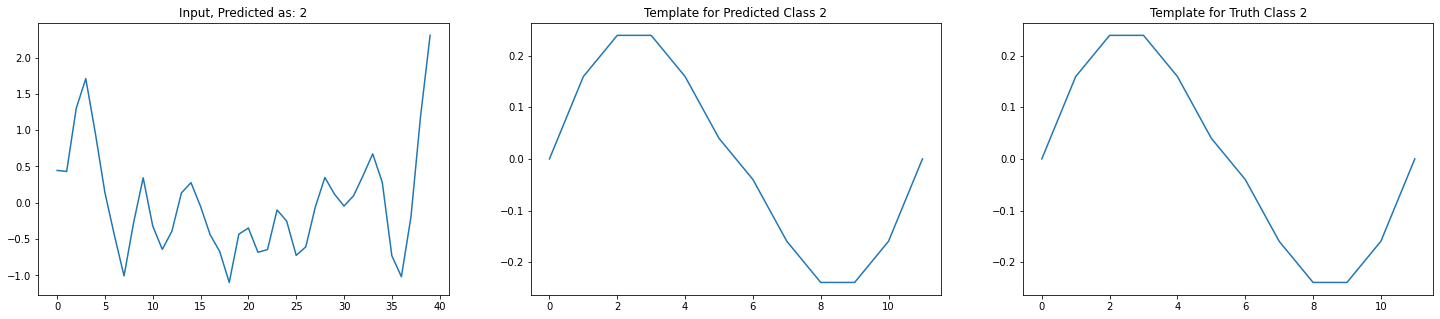

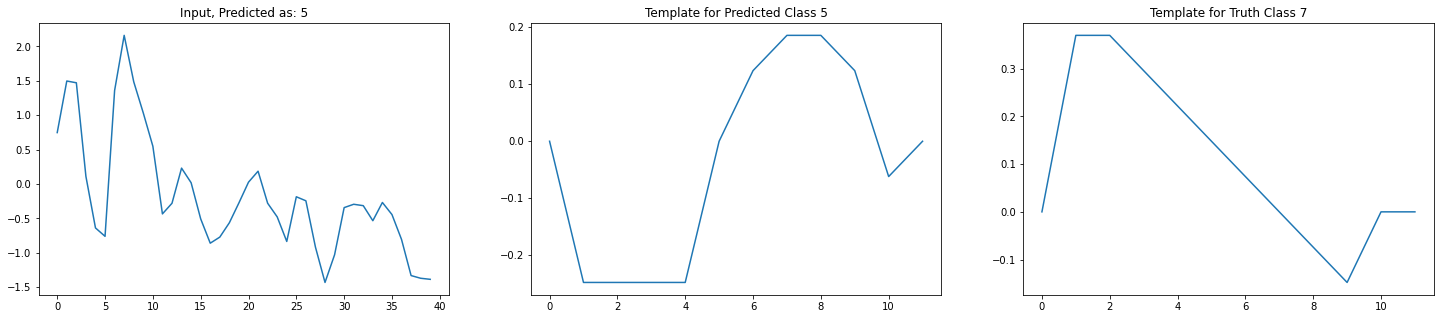

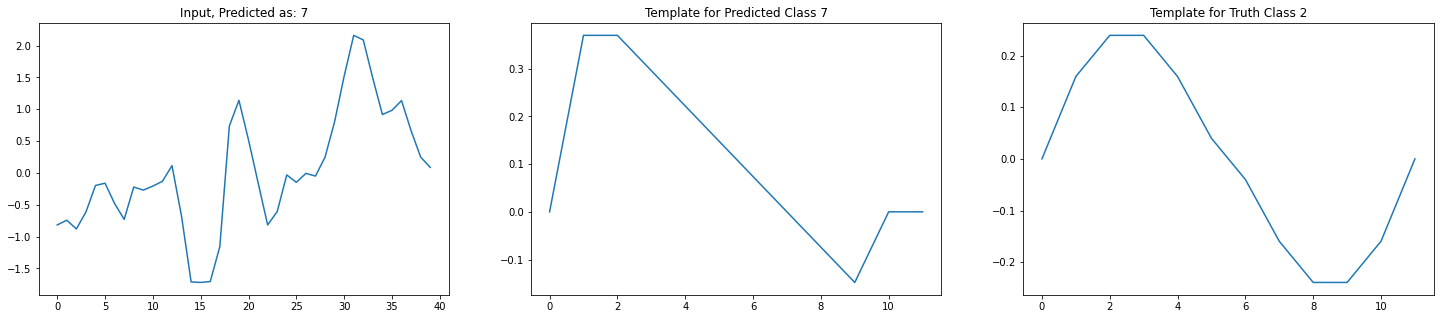

In [17]:
# Incorrect examples

index_example2 = [29, 98, 322, 418, 553, 585 ]
for i in range(len(index_example2)):
  test_template_predict = np.transpose(dataset['templates']['x'][y_predict[index_example2[i]]])
  test_template_truth = np.transpose(dataset['templates']['x'][y_test[index_example2[i]]])
  
  plt.figure(figsize=(25,5))
  plt.subplot(1,3,1)
  plt.plot(x_test[index_example2[i]])
  plt.title('Input, Predicted as: %d' % y_predict[index_example2[i]])
  plt.subplot(1,3,2)
  plt.plot(test_template_predict)
  plt.title('Template for Predicted Class %d' % y_predict[index_example2[i]])
  plt.subplot(1,3,3)
  plt.plot(test_template_truth)
  plt.title('Template for Truth Class %d' % y_test[index_example2[i]])

# **TASK 2 (CNN interpretation)**

# Grad-Cam

Grad cam code referene from XAI_UTILS

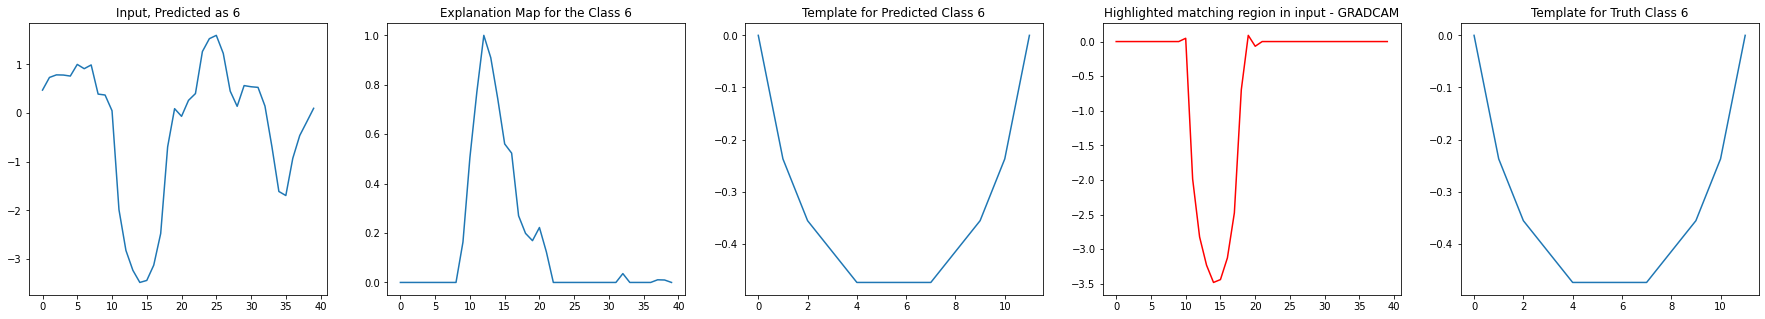

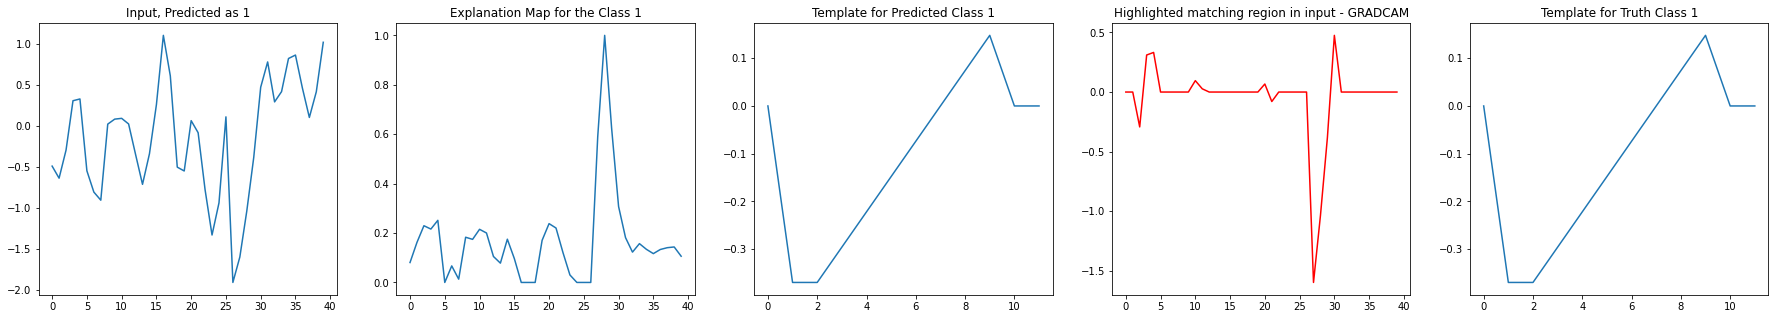

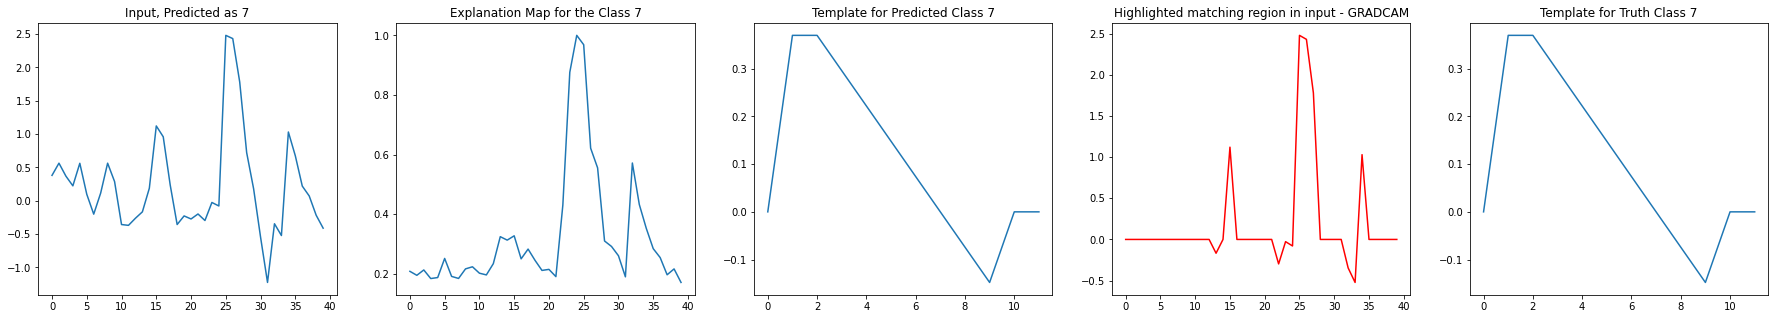

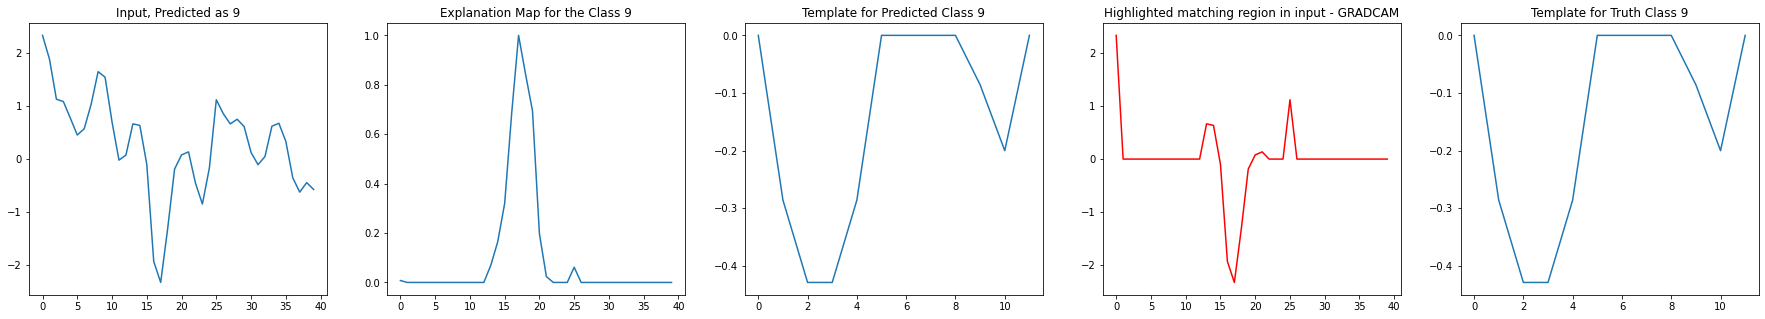

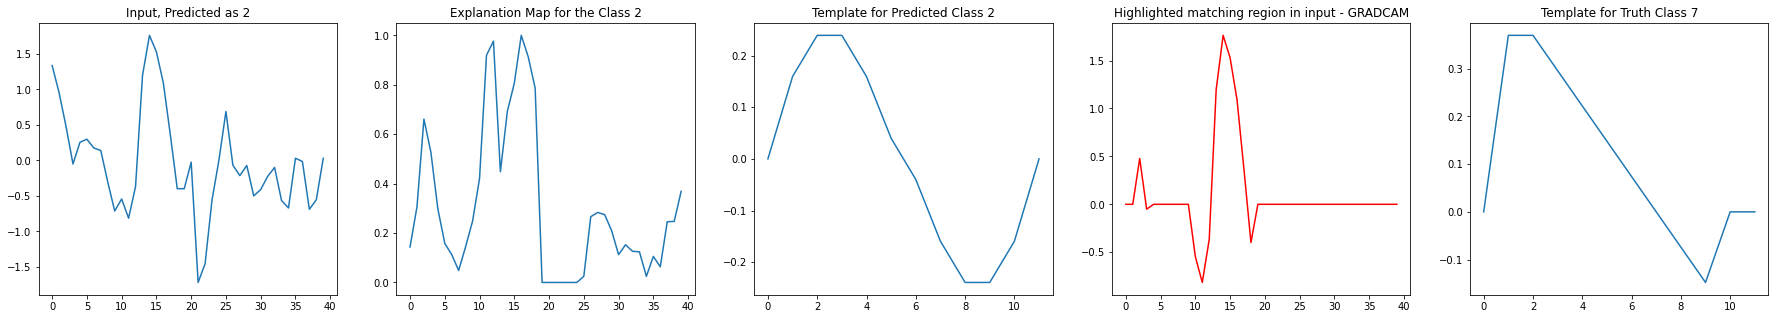

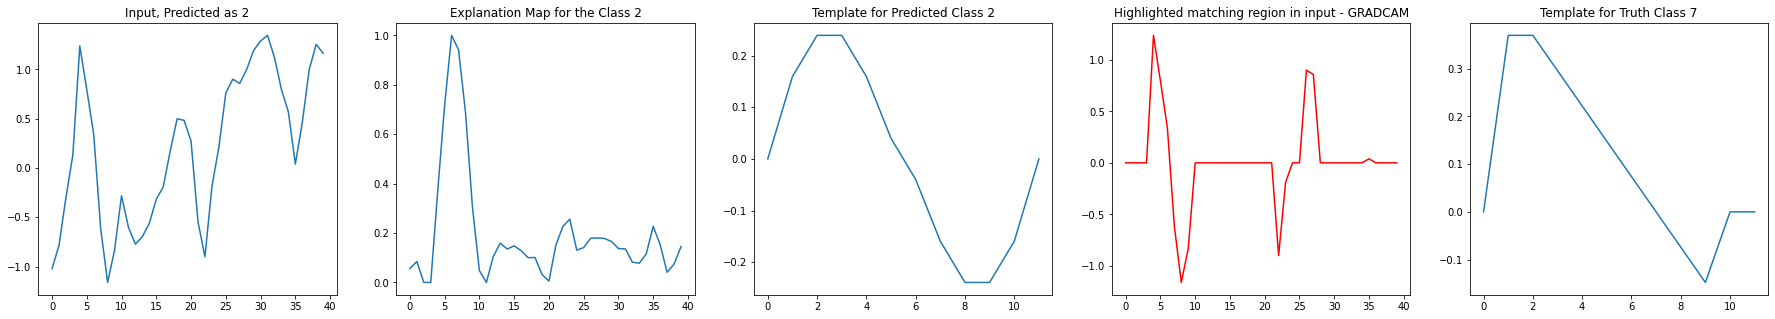

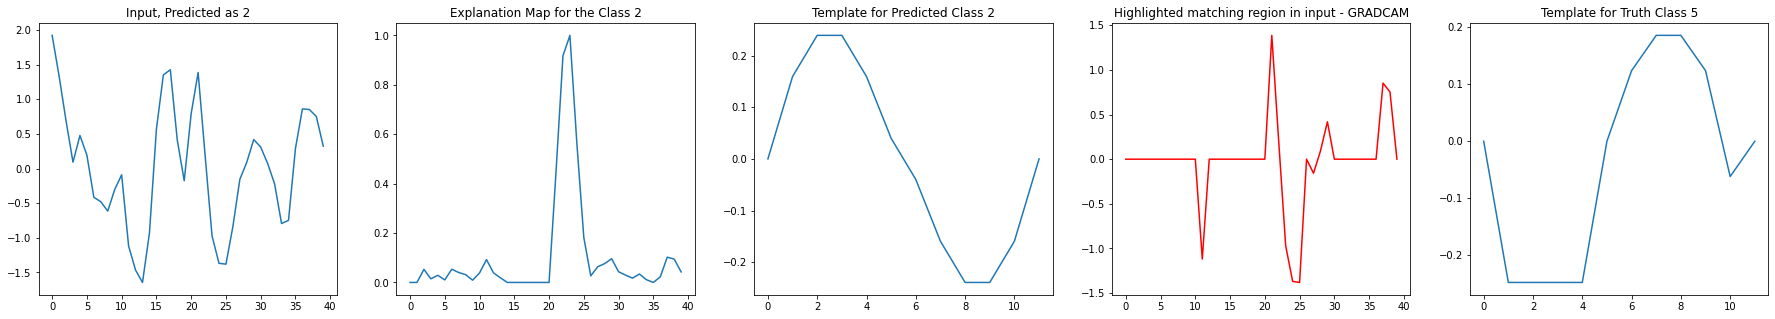

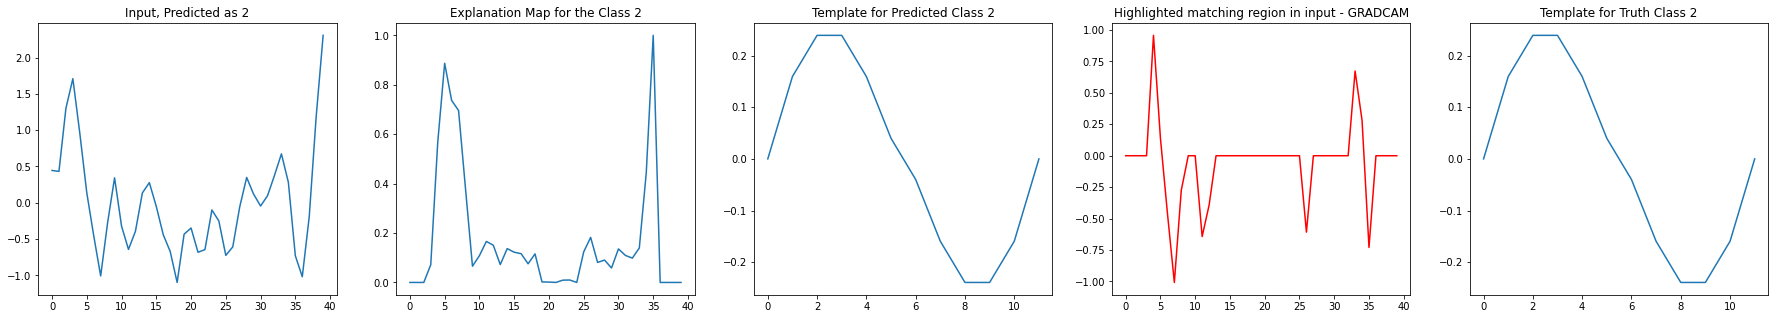

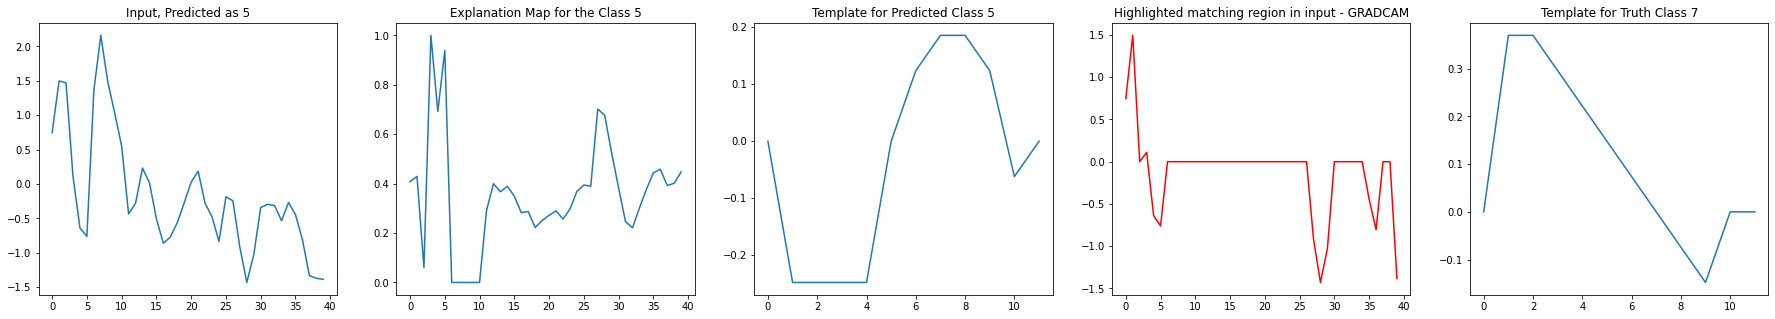

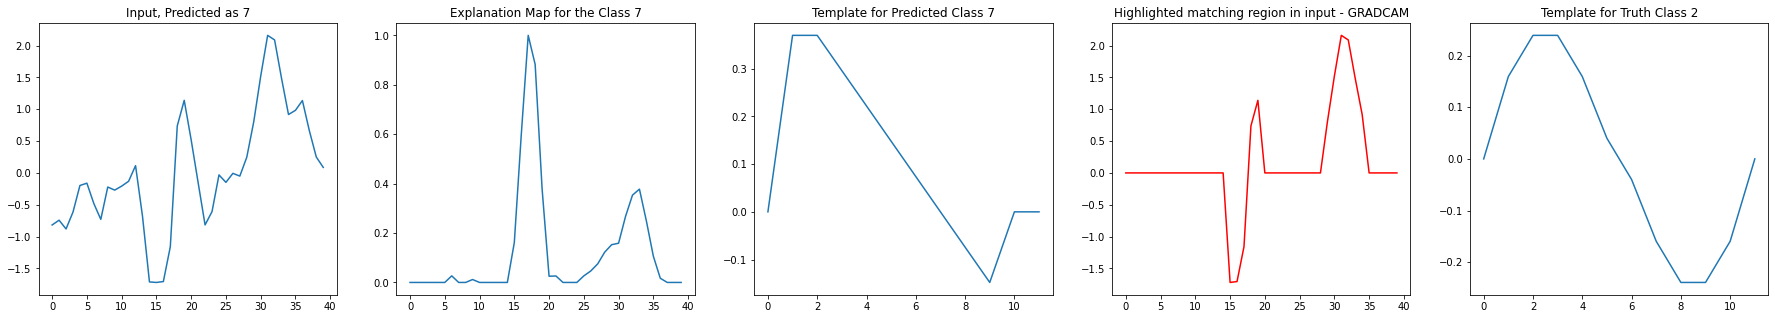

In [19]:
from xai_utils import *
index_g= [1, 6, 11, 19, 29, 98, 322, 418, 553, 585]
for i in range(len(index_g)):
  test_input_grad = np.expand_dims(x_test[index_g[i]], axis=0)
  predicted_out = np.argmax(model_mnist.predict(test_input_grad), axis=-1)

  #explanation = grad_cam(model_mnist, test_input_grad, 'conv1d_5') ## final conv1d layer
  explanation = grad_cam(model_mnist, test_input_grad, 'conv1d_2')

  test_template_truth = np.transpose(dataset['templates']['x'][y_test[index_g[i]]])
  test_template_predict = np.transpose(dataset['templates']['x'][predicted_out])
  test_label = y_test[index_g[i]]

  # Plot Input, Explaination Map, Corresponding digit
  fig1=plt.figure(figsize=(31,5))

  plt.subplot(1,5,1)
  plt.plot(x_test[index_g[i]])
  plt.title('Input, Predicted as %d' % predicted_out[0])

  plt.subplot(1,5,2)
  plt.plot(explanation)
  plt.title('Explanation Map for the Class %d' % predicted_out[0])

  plt.subplot(1,5,3)
  plt.plot(test_template_predict)
  #plt.title('Template for Predicted Class %d' % test_label)
  plt.title('Template for Predicted Class %d' % predicted_out[0])

  threshold = np.sort(explanation)[-12]
  plt.subplot(1,5,4)
  plt.plot((test_input_grad[0,:,0]*(explanation>threshold)), 'r')
  plt.title('Highlighted matching region in input - GRADCAM')

 
  plt.subplot(1,5,5)
  plt.plot(test_template_truth)
  plt.title('Template for Truth Class %d' % y_test[index_g[i]])
  
  fig1.savefig('graddcam_mnist.png', bbox_inches='tight')


# Calculate Drop and Increase Rate - GradCAM

In [20]:
def calculate_drop_increase(images, model, exmap, class_index, frac=0.15):
    '''
    inputs:
        images: a 4-D image of size (1 x H x W x 3)
          containing an image in RGB format and of size (H x W)
        model: The base model
        exmap: a given explanation map whose completeness is to be evaluated.
        class_index: The class to whom the explanation map is related to.
        frac: The fraction of top pixels selected.
    returns:v
        a tuple with 4 calculates values:
        (drop, increase, original_pred, eplanation_pred)
        drop (float): drop rate (between 0 and 1)
        increase (boolean): "1" if increase happened
        original_pred: confidence score for original image
        explanation_pred:  confidence score for the selected top pixels of the image.
    '''
    predictions = model.predict(images)
    #print(images.shape)
    # Pre-processing image 
    img=images[0,:,:]
    #img=img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Getting the prediction for image
    Y=predictions[0][class_index]
    
    grad_array=np.reshape(exmap, (-1,))
    array_size=int(grad_array.shape[0]*frac)
    thr=np.flip(sorted(grad_array))[array_size]
    exmap1_msk=(exmap>thr)
    exmap1_thr=np.zeros(shape=(1,40,1))
    exmap1_thr[0,:,0]=img[0,:,0]*exmap1_msk ## Explanation map
    ex_predictions = model.predict(exmap1_thr)[0]
    O1=ex_predictions[class_index]
    etta=(Y-O1)/(Y+1e-100)
    return (etta*(etta>0), 1*(etta<0), Y, O1)



In [21]:

drop_rate = 0.
increase_rate = 0.
#for i in range(999):
for i in range(1000):
  test_input = np.expand_dims(x_test[i], axis=0)
  test_predict_out = np.argmax(model_mnist.predict(test_input), axis=-1)
  #explanation = grad_cam(model_mnist, test_input, 'conv1d_20')
  explanation = grad_cam(model_mnist, test_input, 'conv1d_2')
  drop_rate += calculate_drop_increase(test_input, model_mnist, explanation, class_index=test_predict_out, frac=0.3)[0]
  increase_rate += calculate_drop_increase(test_input, model_mnist, explanation, class_index=test_predict_out, frac=0.3)[1]
drop_rate = drop_rate / 1000
increase_rate = increase_rate / 1000


In [26]:
print('Drop Rate = ', drop_rate)
print('Increase Rate = ', increase_rate)

Drop Rate =  [0.30102262]
Increase Rate =  [0.359]


#SHAP

advantage -

https://analyticsindiamag.com/a-complete-guide-to-shap-shapley-additive-explanations-for-practitioners/

SHAP or SHapley Additive exPlanation is a visualization tool, it is used for making a machine learning model more explainable by visualizing its output. It can be used for explaining the prediction of any model by computing the contribution of each feature to the prediction.
Using SHAP, we can make outcomes more understandable for users who are not so knowledgeable about the outcomes of machine learning models.





https://ema.drwhy.ai/shapley.html

SHapley Additive exPlanations (SHAP) are based on “Shapley values”, a concept lies in the cooperative game theory, which helps to determine actions and contributions of each individual player.


( for explanation only - Let’s translate this problem to the context of a model’s predictions. Explanatory variables are the players, while model f()plays the role of the coalition. The payoff from the coalition is the model’s prediction. The problem to solve is how to distribute the model’s prediction across particular variables? )



disadv -

https://christophm.github.io/interpretable-ml-book/shapley.html#disadvantages-16



https://shap-lrjball.readthedocs.io/en/latest/generated/shap.GradientExplainer.html#shap.GradientExplainer







https://coderzcolumn.com/tutorials/machine-learning/shap-explain-machine-learning-model-predictions-using-game-theoretic-approach

GradientExplainer - This explainer is used for differentiable models which are based on the concept of expected gradients which itself is an extension of the integrated gradients method.

In [22]:
!pip install shap
#https://github.com/slundberg/shap

     |████████████████████████████████| 564 kB 4.4 MB/s 


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


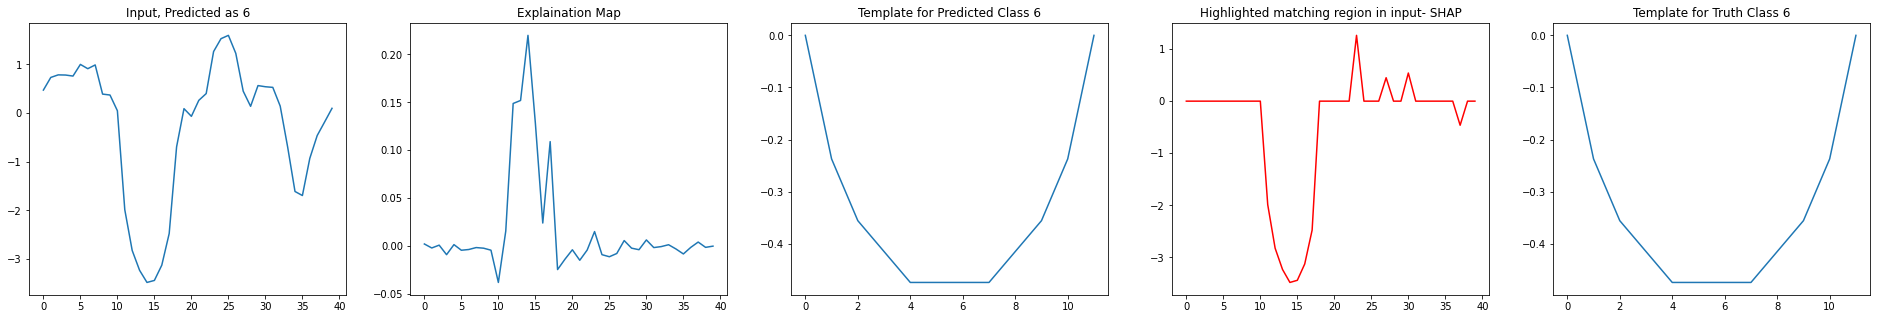

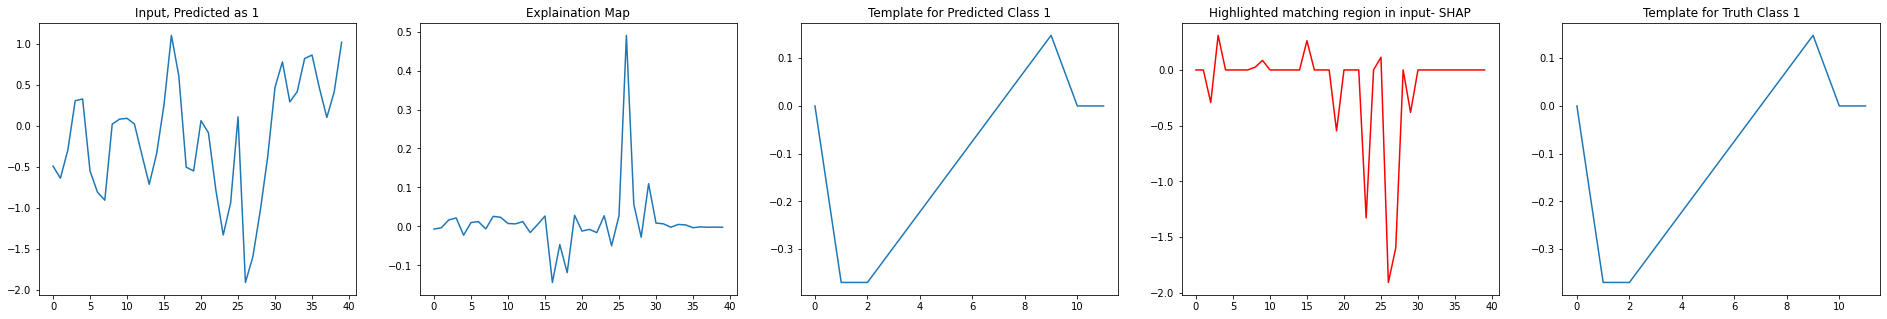

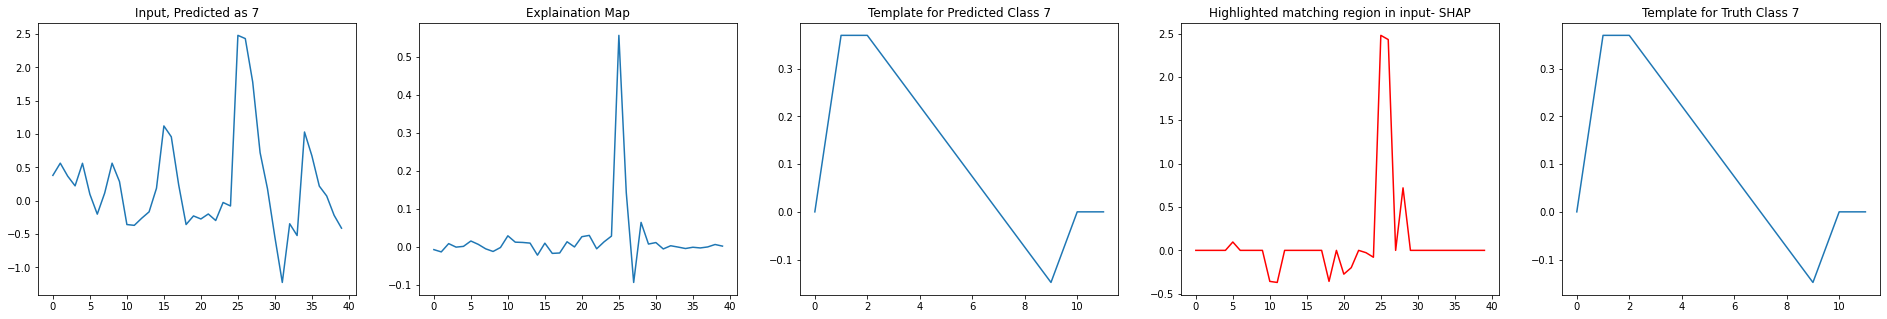

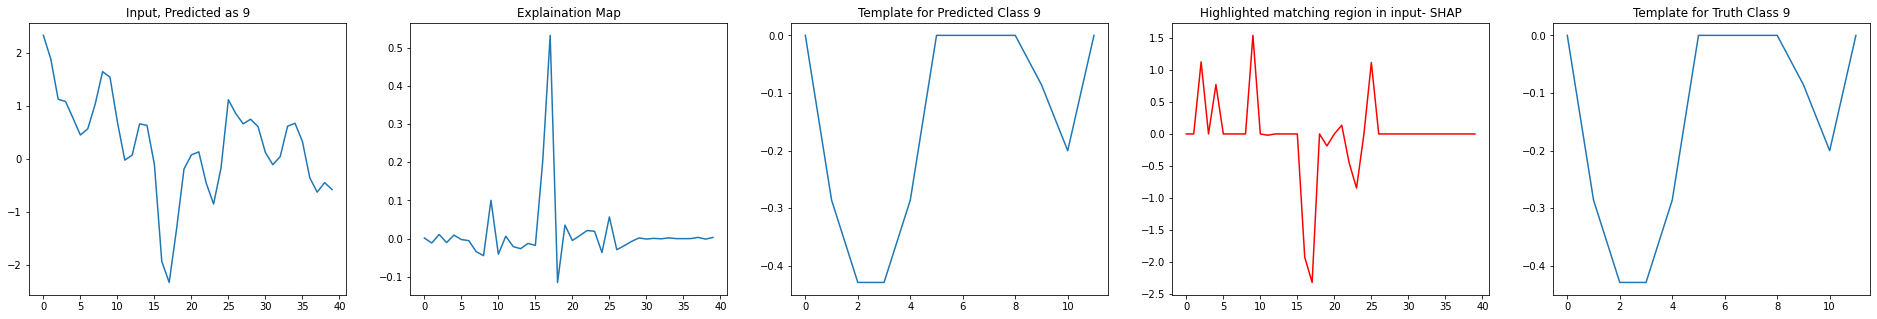

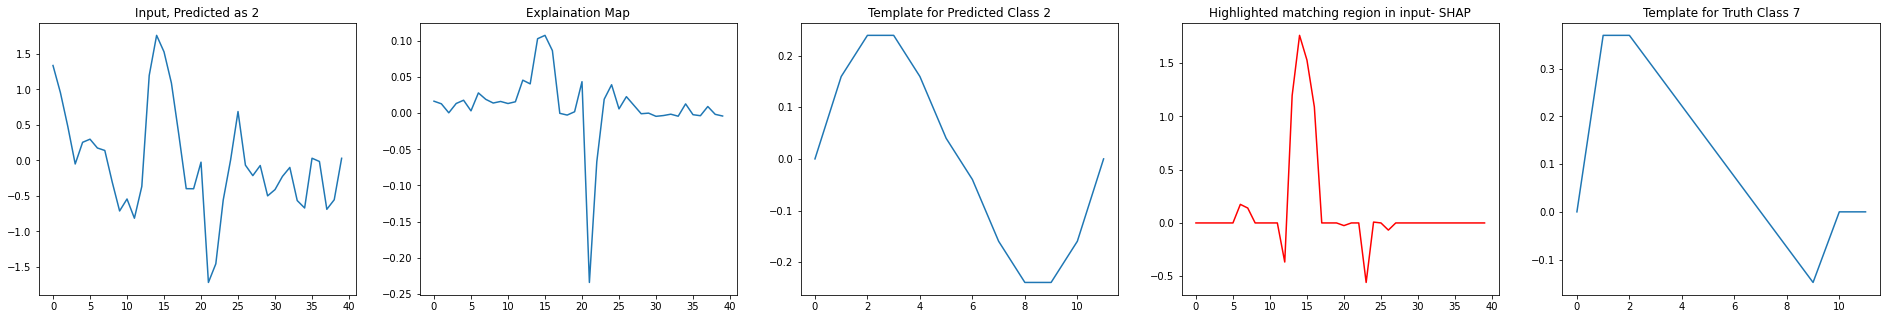

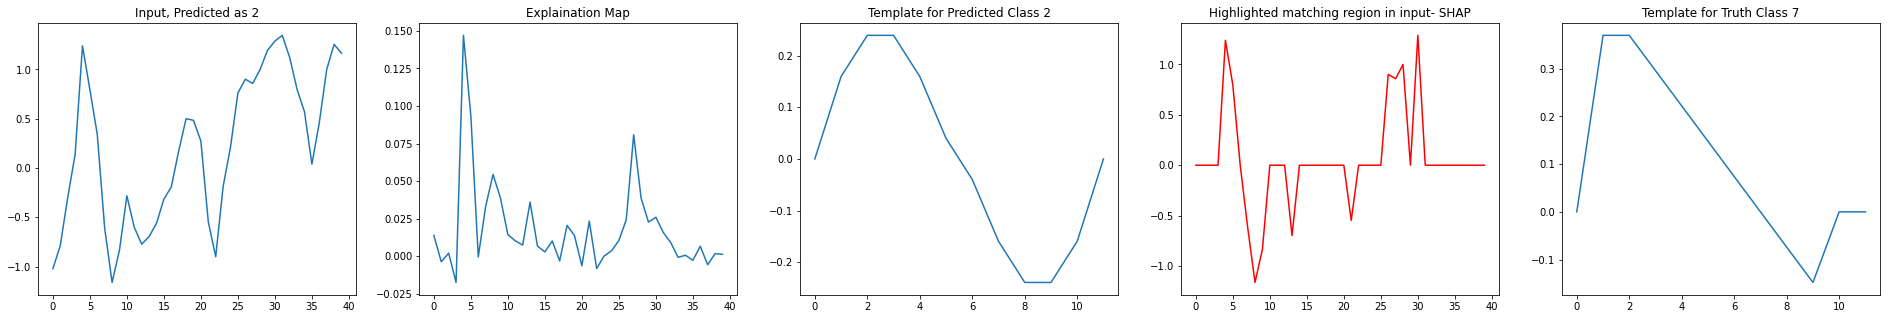

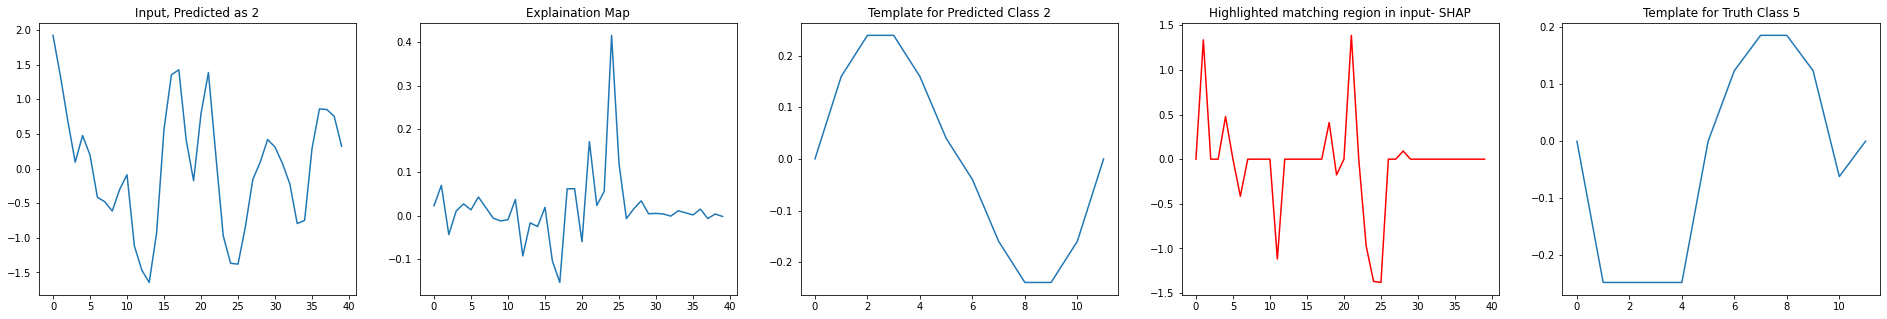

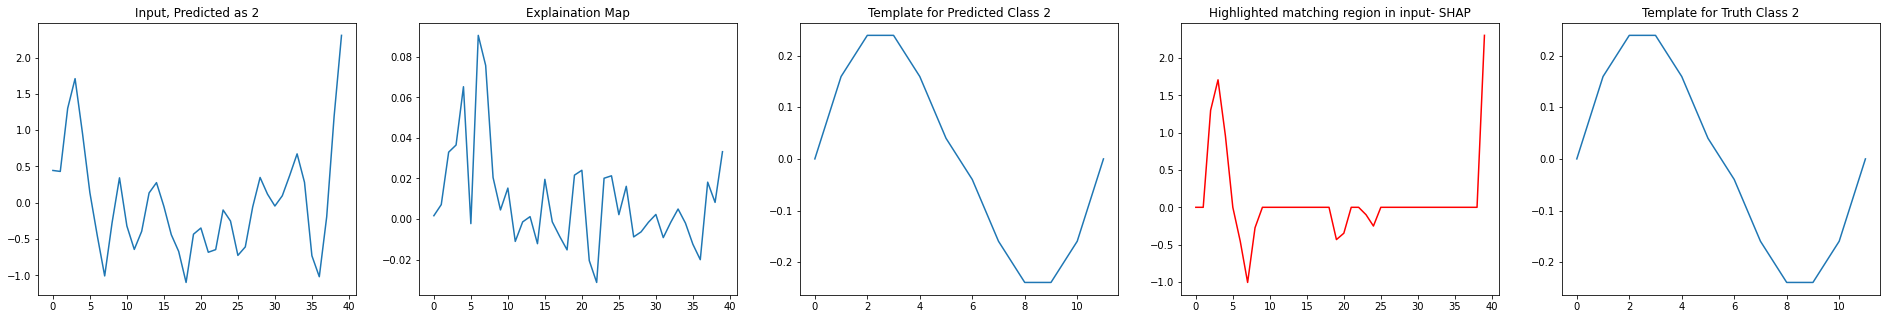

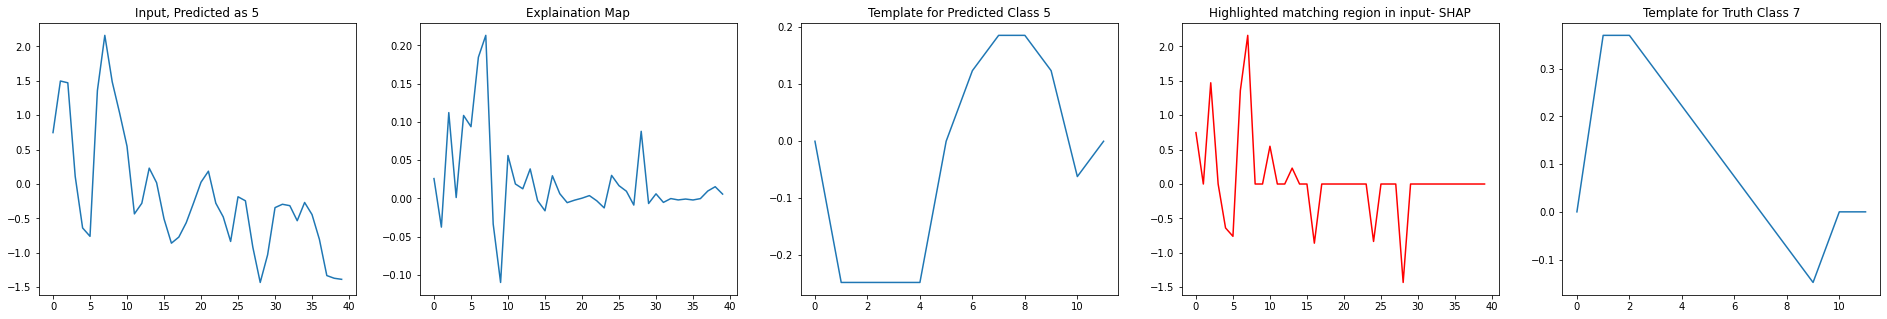

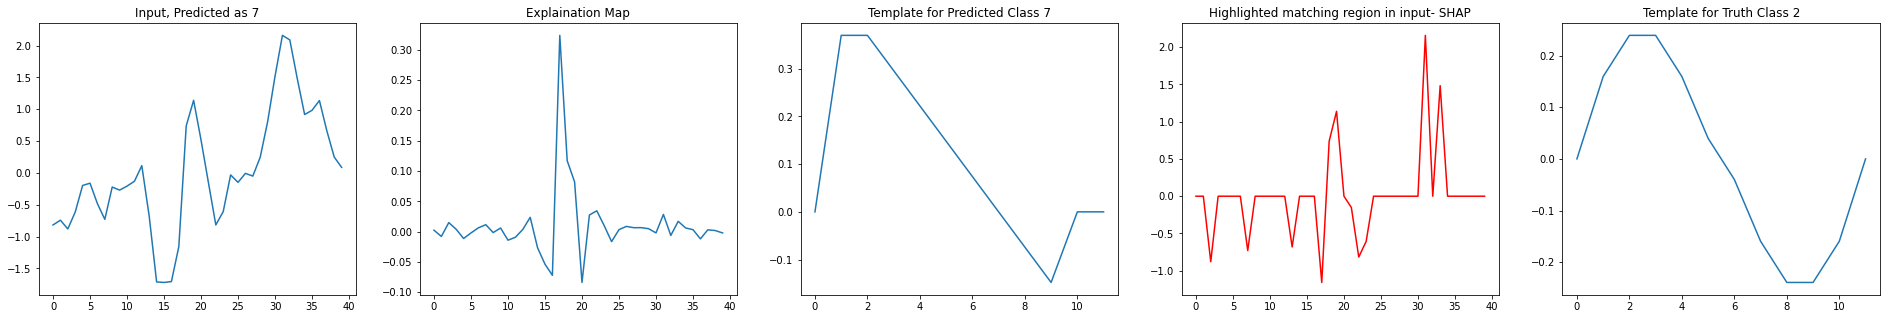

In [23]:
%load_ext autoreload
%autoreload 2
import shap
index = [1, 6, 11, 19, 29, 98, 322, 418, 553, 585]
test_input_shap = np.expand_dims(dataset['x'], axis=-1)
explainer = shap.GradientExplainer(model_mnist, test_input_shap)

for i in range(len(index)):
  x_input_shap = np.expand_dims(x_test[index[i]], axis=0)
  shapley_val = explainer.shap_values(x_input_shap)
  test_predict_out2 = np.argmax(model_mnist.predict(x_input_shap), axis=-1)
  shapley_val_out = np.squeeze(shapley_val[test_predict_out2[0]])

  test_label = y_test[index[i]]
  test_pred_template = np.transpose(dataset['templates']['x'][test_predict_out2])
  test_truth_template = np.transpose(dataset['templates']['x'][y_test[index[i]]])
  
  fig1 = plt.figure(figsize=(33,5))

  plt.subplot(1,5,1)
  plt.plot(x_test[index[i]])
  plt.title('Input, Predicted as %d' % test_predict_out2[0])

  plt.subplot(1,5,2)
  plt.plot(shapley_val_out)
  plt.title('Explaination Map')

  plt.subplot(1,5,3)
  plt.plot(test_pred_template)
  #plt.title('Template for Predicted Class %d' % test_label)
  plt.title('Template for Predicted Class %d' % test_predict_out2)
  
  #threshold = np.sort(explanation)[-12]
  #plt.subplot(1,4,4)
  #plt.plot(exmap1_thr[0,:,0], 'r')
  #plt.title('Highlighted matching region in input')
  
  shap_array=np.reshape(shapley_val_out, (-1,))
  thr = np.sort(shap_array)[-12]
  exmap1_msk=(shapley_val_out>thr)
  exmap1_thr=np.zeros(shape=(1,40,1))
  exmap1_thr[0,:,0]=x_input_shap[0,:,0]*exmap1_msk
  
  plt.subplot(1,5,4)
  plt.plot(exmap1_thr[0,:,0], 'r')
  plt.title('Highlighted matching region in input- SHAP')

  plt.subplot(1,5,5)
  plt.plot(test_truth_template)
  plt.title('Template for Truth Class %d' % y_test[index_g[i]])

  fig1.savefig('Shap_exmap_mnist.png', bbox_inches='tight')

In [ ]:
#print(shapley_val)
#shapley_val.shape#

# Drop and Increase Rate

In [28]:
drop_rate = 0.
increase_rate = 0.
for i in range(1000):
  test_input = np.expand_dims(x_test[i], axis=0)
  test_predict_out = np.argmax(model_mnist.predict(test_input), axis=-1)
  shapley_val = explainer.shap_values(test_input)
  shap_values_out = np.squeeze(shapley_val[test_predict_out[0]])
  drop_rate += calculate_drop_increase(test_input, model_mnist, shap_values_out, class_index=test_predict_out, frac=0.3)[0]
  increase_rate += calculate_drop_increase(test_input, model_mnist, shap_values_out, class_index=test_predict_out, frac=0.3)[1]
drop_rate = drop_rate / 1000
increase_rate = increase_rate / 1000

In [27]:
print('Drop Rate = ', drop_rate)
print('Increase Rate = ', increase_rate)

Drop Rate =  [0.30102262]
Increase Rate =  [0.359]
